## QUANTITATIVE FINANCE PART 1

### FUNDAMENTAL ANALAYSIS 

RATE OF RETURN & COMPOUND INTEREST

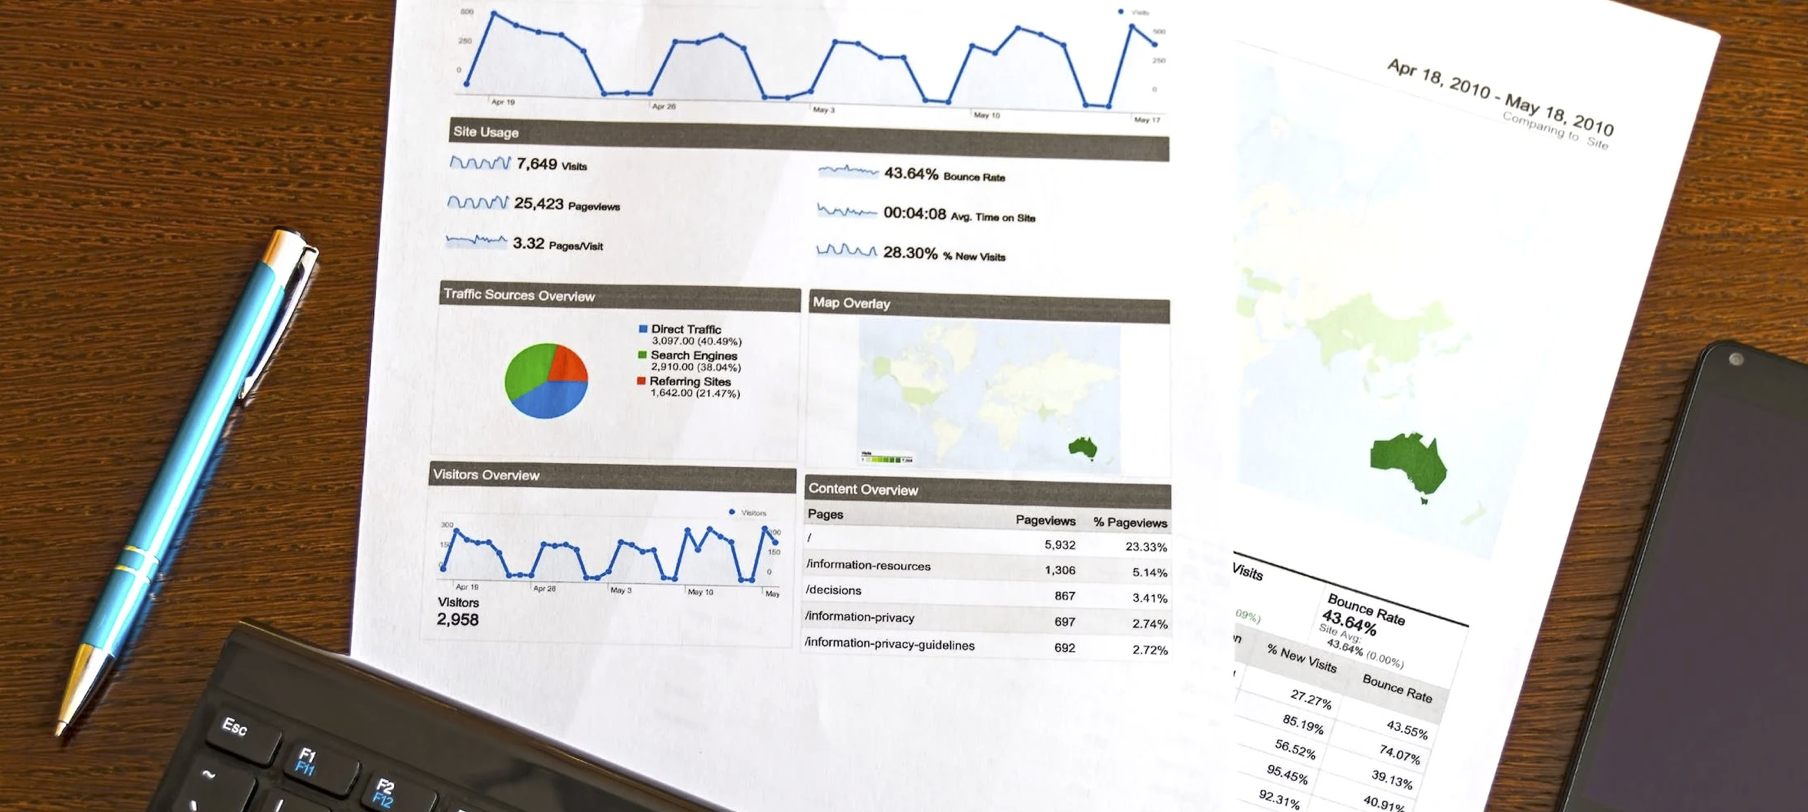

#### Hemant Thapa

#### INCOME STATEMENT

An income statement, also known as a profit and loss statement, is a financial document that summarizes a company's revenue and expenses over a specified period of time, typically a fiscal quarter or year. The purpose of an income statement is to give stakeholders an understanding of a company's financial performance, including its operating efficiency and profitability. The income statement provides information on how much money a company made, how much it spent, and what its net income was after accounting for all its revenues and expenses. The income statement is a crucial tool for investors, analysts, and managers to assess a company's financial health and make informed decisions about its future.

#### RATE OF RETURN & RETURN ON INVESTMENT

The rate of return, also referred to as the return on investment (ROI), is a metric employed in the evaluation of investment performance. It quantifies the amount of money generated by an investment over a defined time frame, expressed as a percentage of the initial investment. This metric is considered to be of utmost importance by investors when making decisions about resource allocation, as it provides a gauge of the investment's profitability and associated risk.

Investors can calculate the rate of return for a wide range of investment vehicles, including equities, bonds, mutual funds, real estate, and commodities. It is a useful tool for comparing the performance of different investments and determining which ones are likely to yield the best returns over time. The rate of return calculation takes into account the initial investment amount, any income generated by the investment, and any fluctuations in the investment's value over the specified time period.

It is important to note that the rate of return should not be the sole consideration when making investment decisions. Other factors such as investment stability, level of risk involved, and the investor's personal goals and risk tolerance must also be taken into account. Despite this, the rate of return remains a widely used and highly valuable metric for evaluating investment performance.

#### IMPORTING LIBRARIES

In [695]:
import googlefinance
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import speech_recognition as sr
from bs4 import BeautifulSoup
import fundamentalanalysis as fa
from matplotlib import ticker
import numpy_financial as npf

### DESIGNING MODEL FOR INCOME STATEMENT 

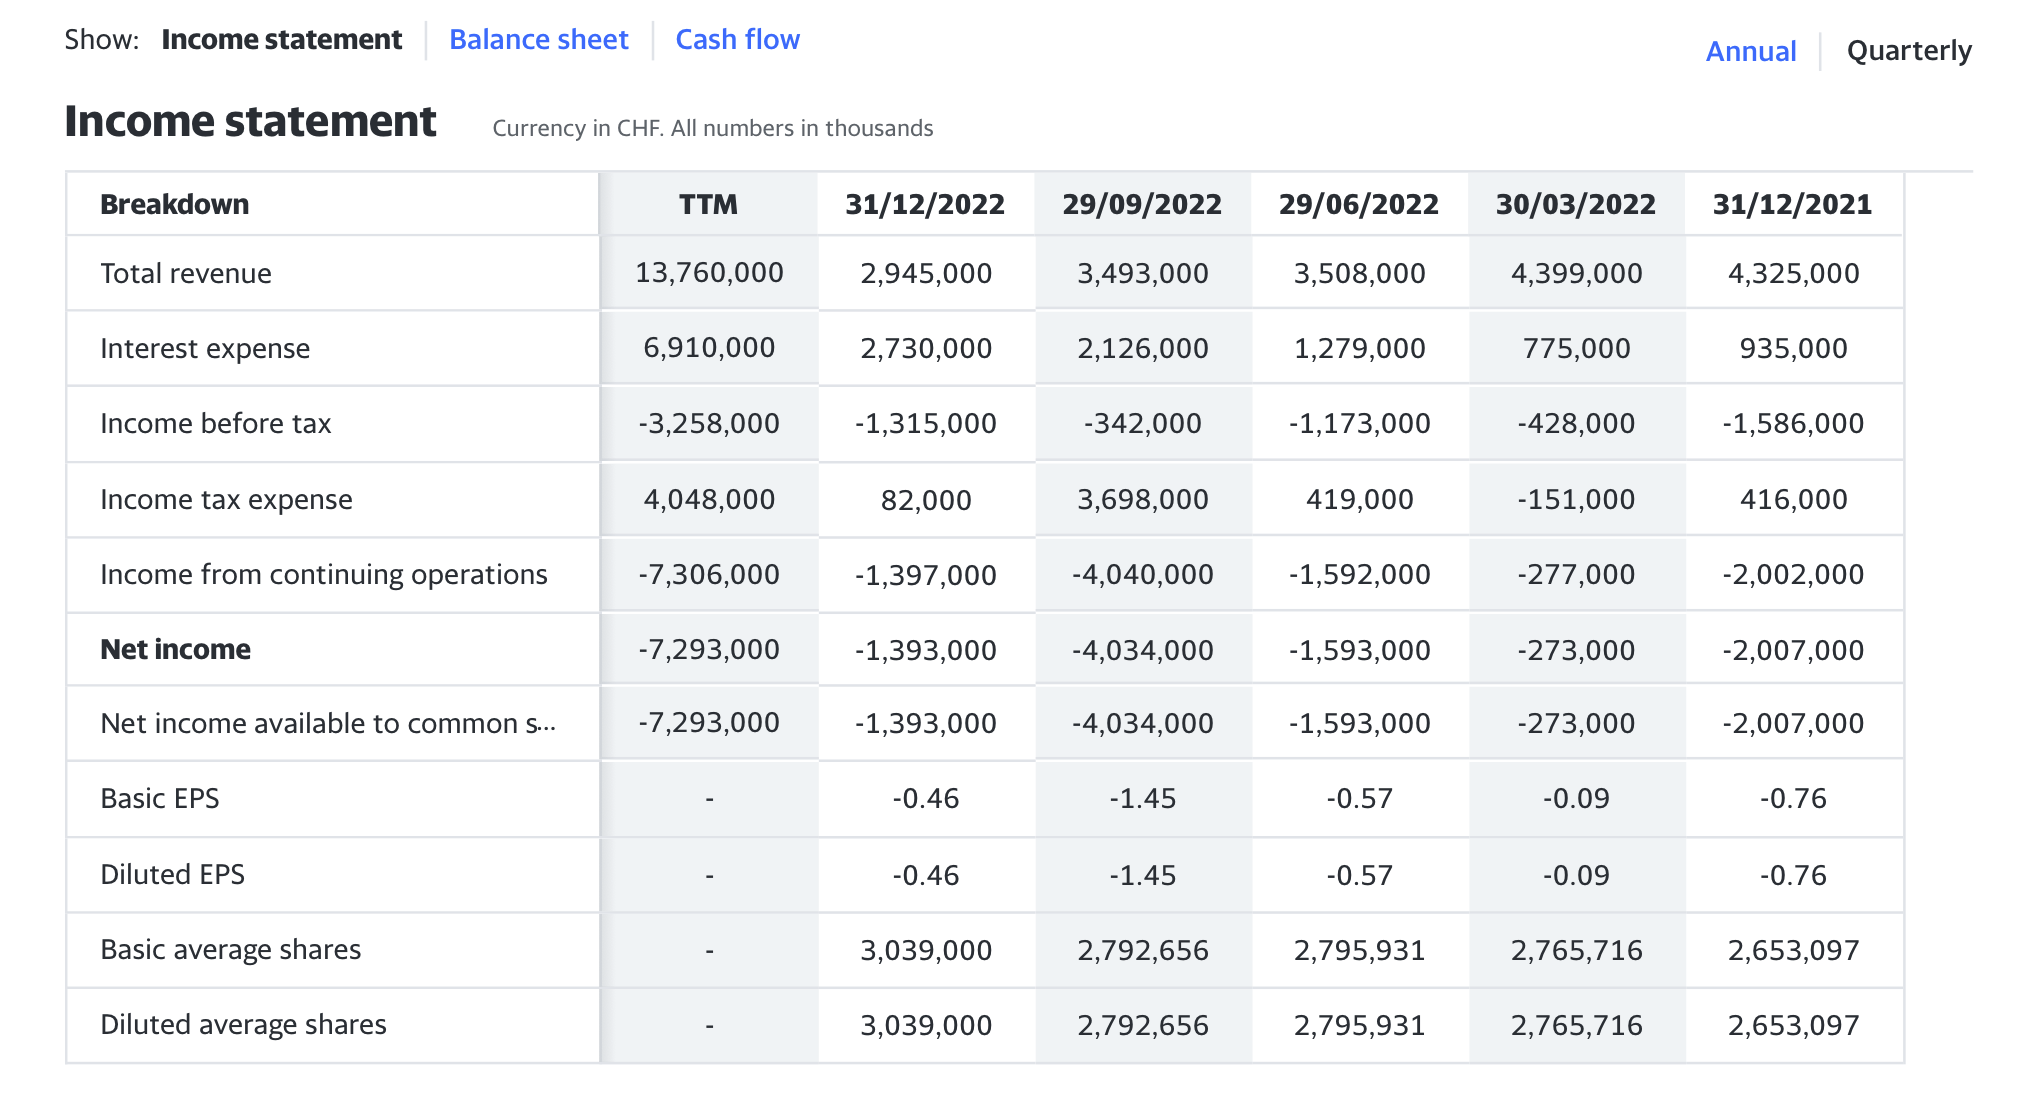

The present income statement of Credit Suisse (CS) showcases a detailed analysis of the company's financial performance over a specified period of time. The document provides a comprehensive breakdown of the company's revenue, costs, and profits, enabling stakeholders to gain a thorough understanding of the company's financial position. The statement is structured into several segments, including Total Revenue, Cost of Revenue, Gross Profit, Operating Expenses, Operating Income or Loss, and Net Income. These segments provide insight into the various sources of revenue, the costs associated with generating that revenue, and the company's overall profitability. This information is critical for investors, analysts, and decision-makers to make informed judgments about the company's financial health and future prospects.

In [680]:
symbol = "CS"
api_key = "YOUR_API_KEY"
url = f"https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={symbol}&apikey={api_key}"

response = requests.get(url)
data = response.json()
price = data["Global Quote"]["05. price"]
print(price)

0.8612


In [681]:
df = pd.DataFrame.from_dict(data, orient='columns')

print(df)

                       Global Quote
01. symbol                       CS
02. open                     0.8207
03. high                     0.8640
04. low                      0.8207
05. price                    0.8612
06. volume                 63308267
07. latest trading day   2023-03-24
08. previous close           0.8719
09. change                  -0.0107
10. change percent         -1.2272%


In [682]:
ticker = "CS"
api_key = "6eb8c70712a889b4f7efbf8d8ad902d4"

In [683]:
stock = yf.Ticker(ticker)
stock_history = stock.history(period="1y")

In [684]:
stock_history.reset_index(inplace=True)

In [685]:
income_statement_annually = fa.income_statement(ticker, api_key, period="annual")

In [687]:
income_statement_annually

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
reportedCurrency,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,...,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF
cik,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,...,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510
fillingDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,...,2009-12-31,2008-12-31,2007-12-31,2006-12-31,2005-12-31,2004-12-31,2003-12-31,2002-12-31,2001-12-31,2000-12-31
acceptedDate,2022-12-30 19:00:00,2021-12-30 19:00:00,2020-12-30 19:00:00,2019-12-30 19:00:00,2018-12-30 19:00:00,2017-12-30 19:00:00,2016-12-30 19:00:00,2015-12-30 19:00:00,2014-12-30 19:00:00,2013-12-30 19:00:00,...,2009-12-30 19:00:00,2008-12-30 19:00:00,2007-12-30 19:00:00,2006-12-30 19:00:00,2005-12-30 19:00:00,2004-12-30 19:00:00,2003-12-30 19:00:00,2002-12-30 19:00:00,2001-12-30 19:00:00,2000-12-30 19:00:00
calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
revenue,14537000000,15987000000,20635000000,20471000000,19297000000,19242000000,17741000000,21766000000,24037000000,23837000000,...,31676000000,9750000000,36868000000,36185000000,60774282000,53940686800,51474706400,70656113320,75664155120,66761973500
costOfRevenue,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
grossProfit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
grossProfitRatio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [688]:
income_statement_annually.to_csv('credit_suisse_come_statement.csv', index=True)

In [689]:
credit_suisse_income_statement = pd.read_csv('credit_suisse_come_statement.csv')

In [690]:
credit_suisse_income_statement.columns.values[0] = "breakdown"

In [691]:
credit_suisse_income_statement

,breakdown,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,reportedCurrency,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,...,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF
1,cik,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,...,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510
2,fillingDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,...,2009-12-31,2008-12-31,2007-12-31,2006-12-31,2005-12-31,2004-12-31,2003-12-31,2002-12-31,2001-12-31,2000-12-31
3,acceptedDate,2022-12-30 19:00:00,2021-12-30 19:00:00,2020-12-30 19:00:00,2019-12-30 19:00:00,2018-12-30 19:00:00,2017-12-30 19:00:00,2016-12-30 19:00:00,2015-12-30 19:00:00,2014-12-30 19:00:00,...,2009-12-30 19:00:00,2008-12-30 19:00:00,2007-12-30 19:00:00,2006-12-30 19:00:00,2005-12-30 19:00:00,2004-12-30 19:00:00,2003-12-30 19:00:00,2002-12-30 19:00:00,2001-12-30 19:00:00,2000-12-30 19:00:00
4,calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
5,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
6,revenue,14537000000,15987000000,20635000000,20471000000,19297000000,19242000000,17741000000,21766000000,24037000000,...,31676000000,9750000000,36868000000,36185000000,60774282000,53940686800,51474706400,70656113320,75664155120,66761973500
7,costOfRevenue,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,grossProfit,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,grossProfitRatio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 23 YEAR REVENUE CHART OF CREDIT SUISSE 

In [692]:
data = credit_suisse_income_statement.loc[6]
data

breakdown        revenue
2022         14537000000
2021         15987000000
2020         20635000000
2019         20471000000
2018         19297000000
2017         19242000000
2016         17741000000
2015         21766000000
2014         24037000000
2013         23837000000
2012         21583000000
2011         24132000000
2010         29205000000
2009         31676000000
2008          9750000000
2007         36868000000
2006         36185000000
2005         60774282000
2004         53940686800
2003         51474706400
2002         70656113320
2001         75664155120
2000         66761973500
Name: 6, dtype: object

In [693]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        revenue.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

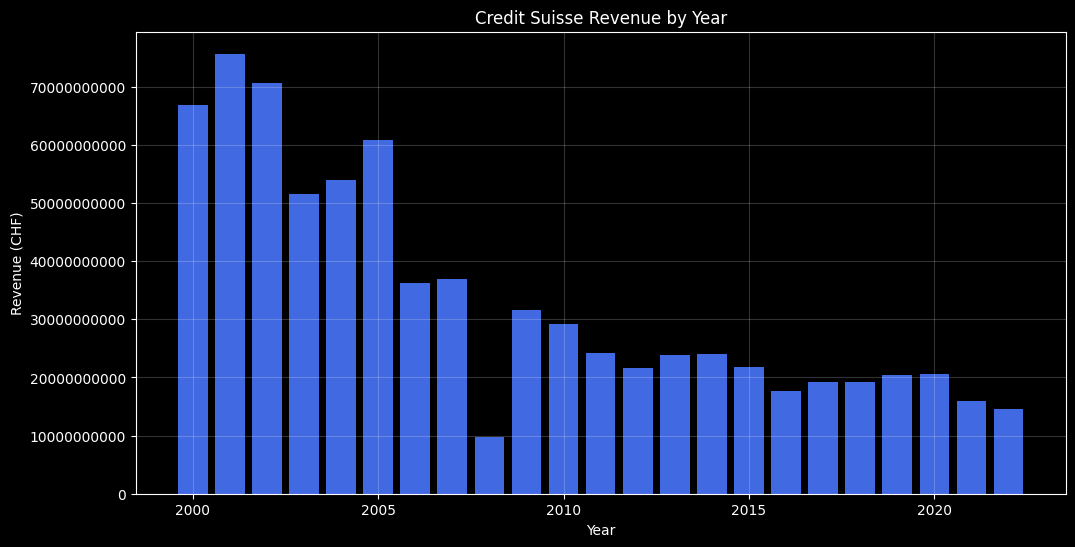

In [697]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year[0],revenue[0], color="royalblue")
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='y', style='plain')
plt.title("Credit Suisse Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue (CHF)")
ax.grid(color='white', alpha=0.20)
plt.show()

In [698]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

In [699]:
# Fit the linear regression model
reg = LinearRegression().fit(year, revenue)
reg

LinearRegression()

In [700]:
revenue.values.reshape(-1,1)

array([[14537000000],
       [15987000000],
       [20635000000],
       [20471000000],
       [19297000000],
       [19242000000],
       [17741000000],
       [21766000000],
       [24037000000],
       [23837000000],
       [21583000000],
       [24132000000],
       [29205000000],
       [31676000000],
       [ 9750000000],
       [36868000000],
       [36185000000],
       [60774282000],
       [53940686800],
       [51474706400],
       [70656113320],
       [75664155120],
       [66761973500]])

In [702]:
# Make predictions
predictions = reg.predict(year)

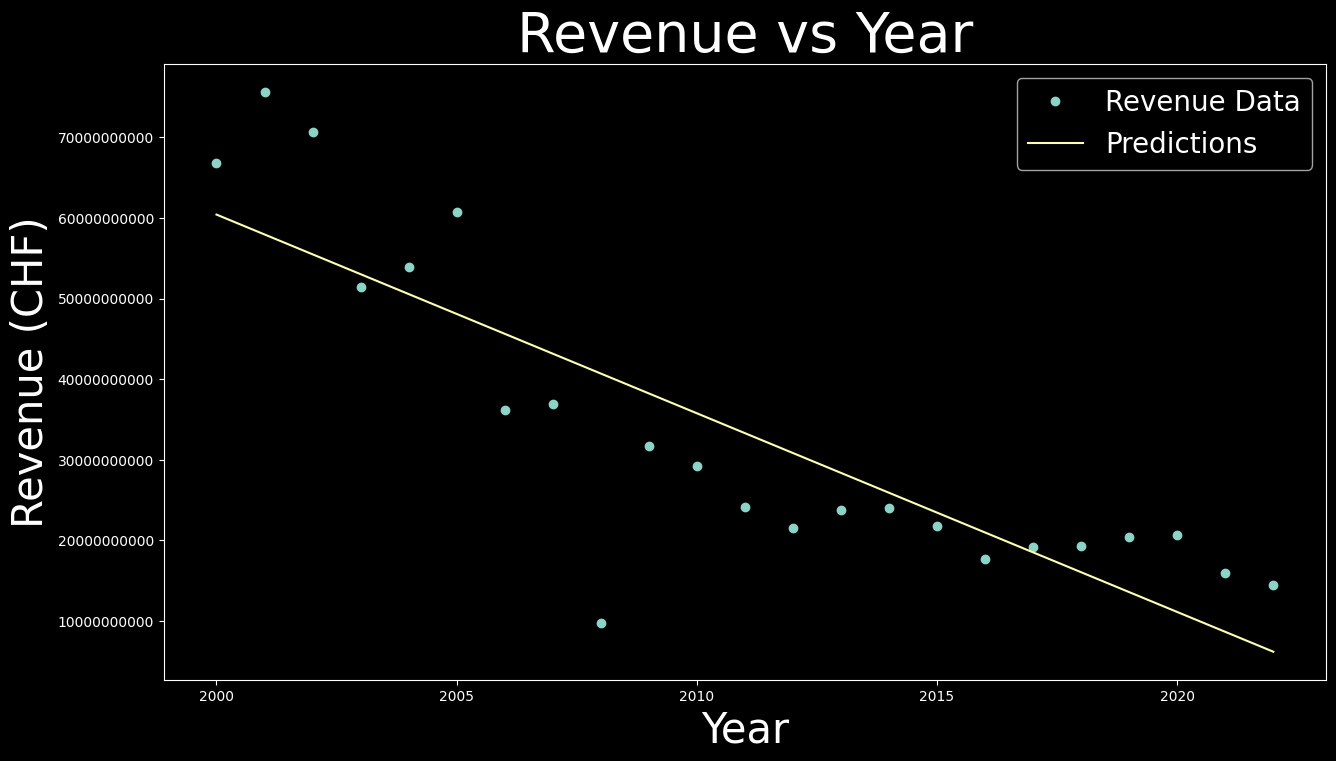

In [704]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.plot(year, revenue, 'o', label='Revenue Data')
plt.plot(year, predictions, label='Predictions')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.xlabel('Year', fontsize=30)
plt.ylabel('Revenue (CHF)', fontsize=30)
plt.title('Revenue vs Year', fontsize=40)
plt.legend(fontsize=20)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

#### 10 YEAR REVENUE CHART OF CREDIT SUISSE

In [705]:
data = credit_suisse_income_statement.loc[6]
data = data.head(10)
data

breakdown        revenue
2022         14537000000
2021         15987000000
2020         20635000000
2019         20471000000
2018         19297000000
2017         19242000000
2016         17741000000
2015         21766000000
2014         24037000000
Name: 6, dtype: object

In [706]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        revenue.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

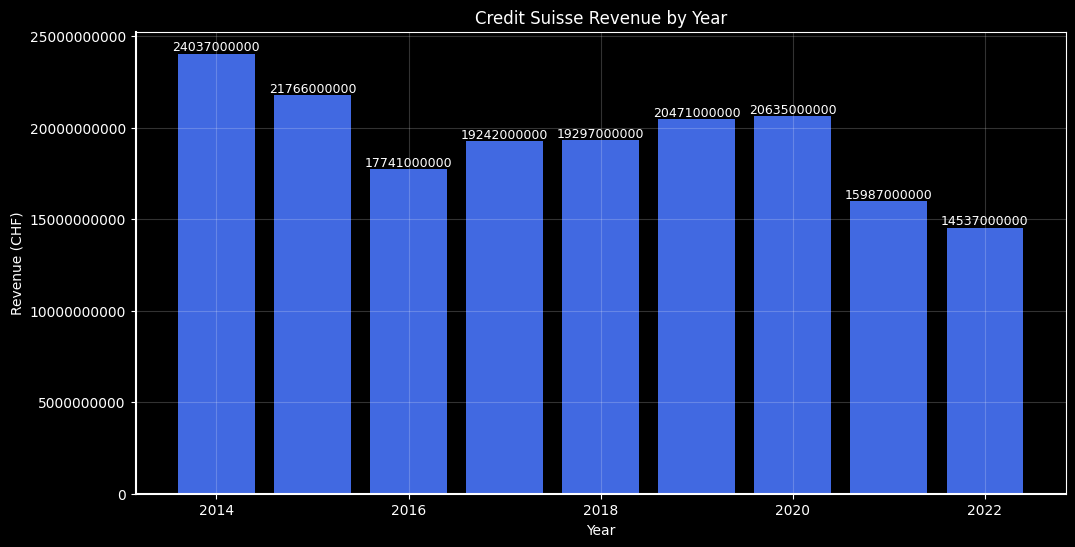

In [708]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year[0],revenue[0], color="royalblue")
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='y', style='plain')
plt.title("Credit Suisse Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue (CHF)")
for i in range(len(year)):
    plt.text(year.iloc[i], revenue.iloc[i], str(revenue.iloc[i][0]), ha='center', va='bottom', fontsize=9)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
ax.grid(color='white', alpha=0.20)
plt.show()

In [709]:
data2 = credit_suisse_income_statement.loc[28]
data2

breakdown      netIncome
2022         -7293000000
2021         -1650000000
2020          2669000000
2019          3419000000
2018          2024000000
2017          -983000000
2016         -2710000000
2015         -2944000000
2014          1875000000
2013          2326000000
2012          1349000000
2011          1953000000
2010          5098000000
2009          6724000000
2008         -8218000000
2007          7760000000
2006         11327000000
2005          5863284000
2004          5620507200
2003           770757520
2002         -3311918920
2001          1592684580
2000          4495538000
Name: 28, dtype: object

In [710]:
year = []
net_income = []
for k, v in data2.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        net_income.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

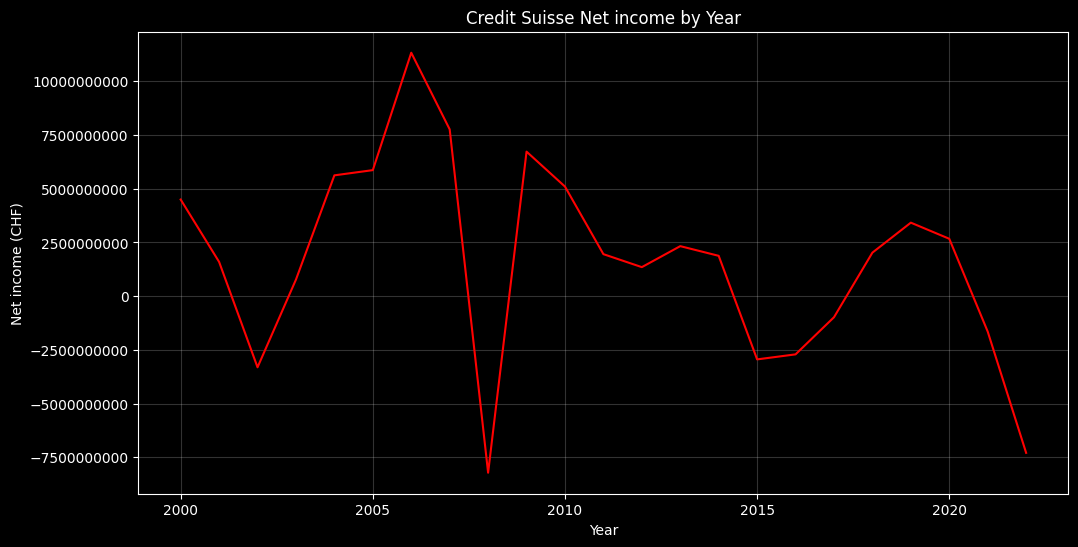

In [712]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(year, net_income, color="red")
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='y', style='plain')
plt.title("Credit Suisse Net income by Year")
plt.xlabel("Year")
plt.ylabel("Net income (CHF)")
ax.grid(color='white', alpha=0.20)

In [713]:
year = year.values.flatten()

In [714]:
year.ndim

1

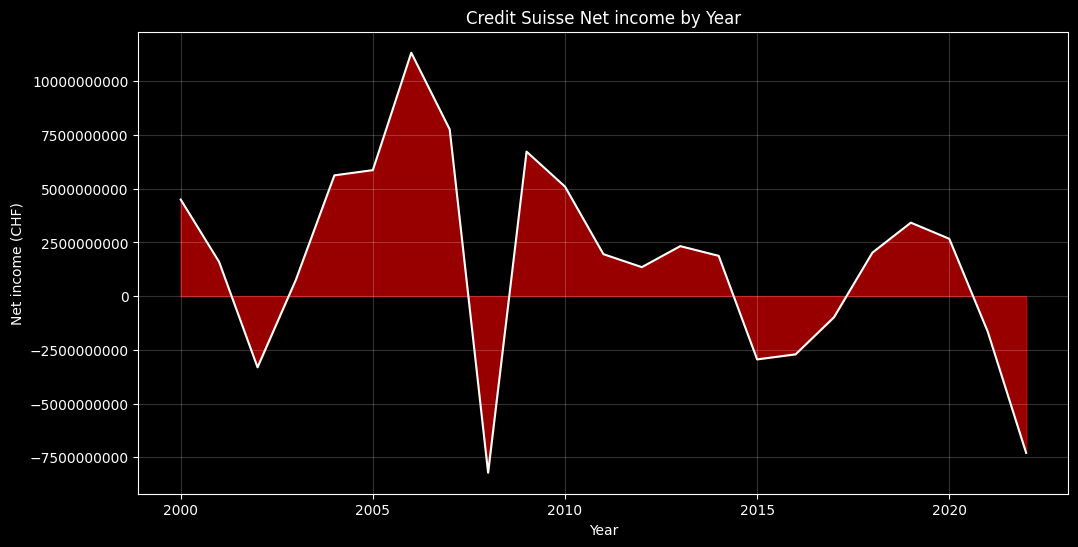

In [715]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(year, net_income, color="white")
plt.fill_between(year, net_income, color="red", alpha=0.6)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='y', style='plain')
plt.title("Credit Suisse Net income by Year")
plt.xlabel("Year")
plt.ylabel("Net income (CHF)")
ax.grid(color='white', alpha=0.20)

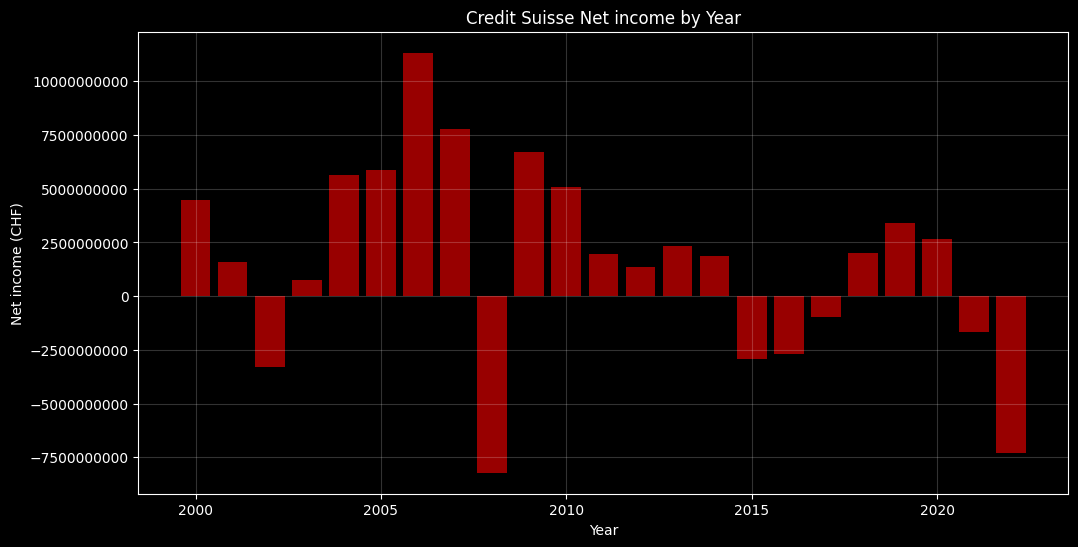

In [716]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year, net_income, color="red", alpha=0.6)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='y', style='plain')
plt.title("Credit Suisse Net income by Year")
plt.xlabel("Year")
plt.ylabel("Net income (CHF)")
ax.grid(color='white', alpha=0.20)

In [719]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

In [720]:
cs = yf.Ticker("CS")
data = cs.history(period="10y")

In [721]:
data['Date_ordinal'] = [datetime.toordinal(d) for d in data.index]
x = data['Date_ordinal'].values.reshape(-1, 1)
y = data['Close']

In [528]:
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, 
                                                    random_state=0)

In [722]:
# Create a linear regression model
model = LinearRegression()

In [723]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [724]:
# Predict the values
y_pred = model.predict(X_test)

In [725]:
y_pred[:5]

array([16.45799518,  8.96835326, 12.7446433 ,  6.12264897,  7.74105899])

In [726]:
X_train

array([[738131],
       [735417],
       [736884],
       ...,
       [736059],
       [736163],
       [737348]])

In [727]:
# Convert ordinal value back to date
X_test = [datetime.fromordinal(int(d)) for d in X_test.flatten()]

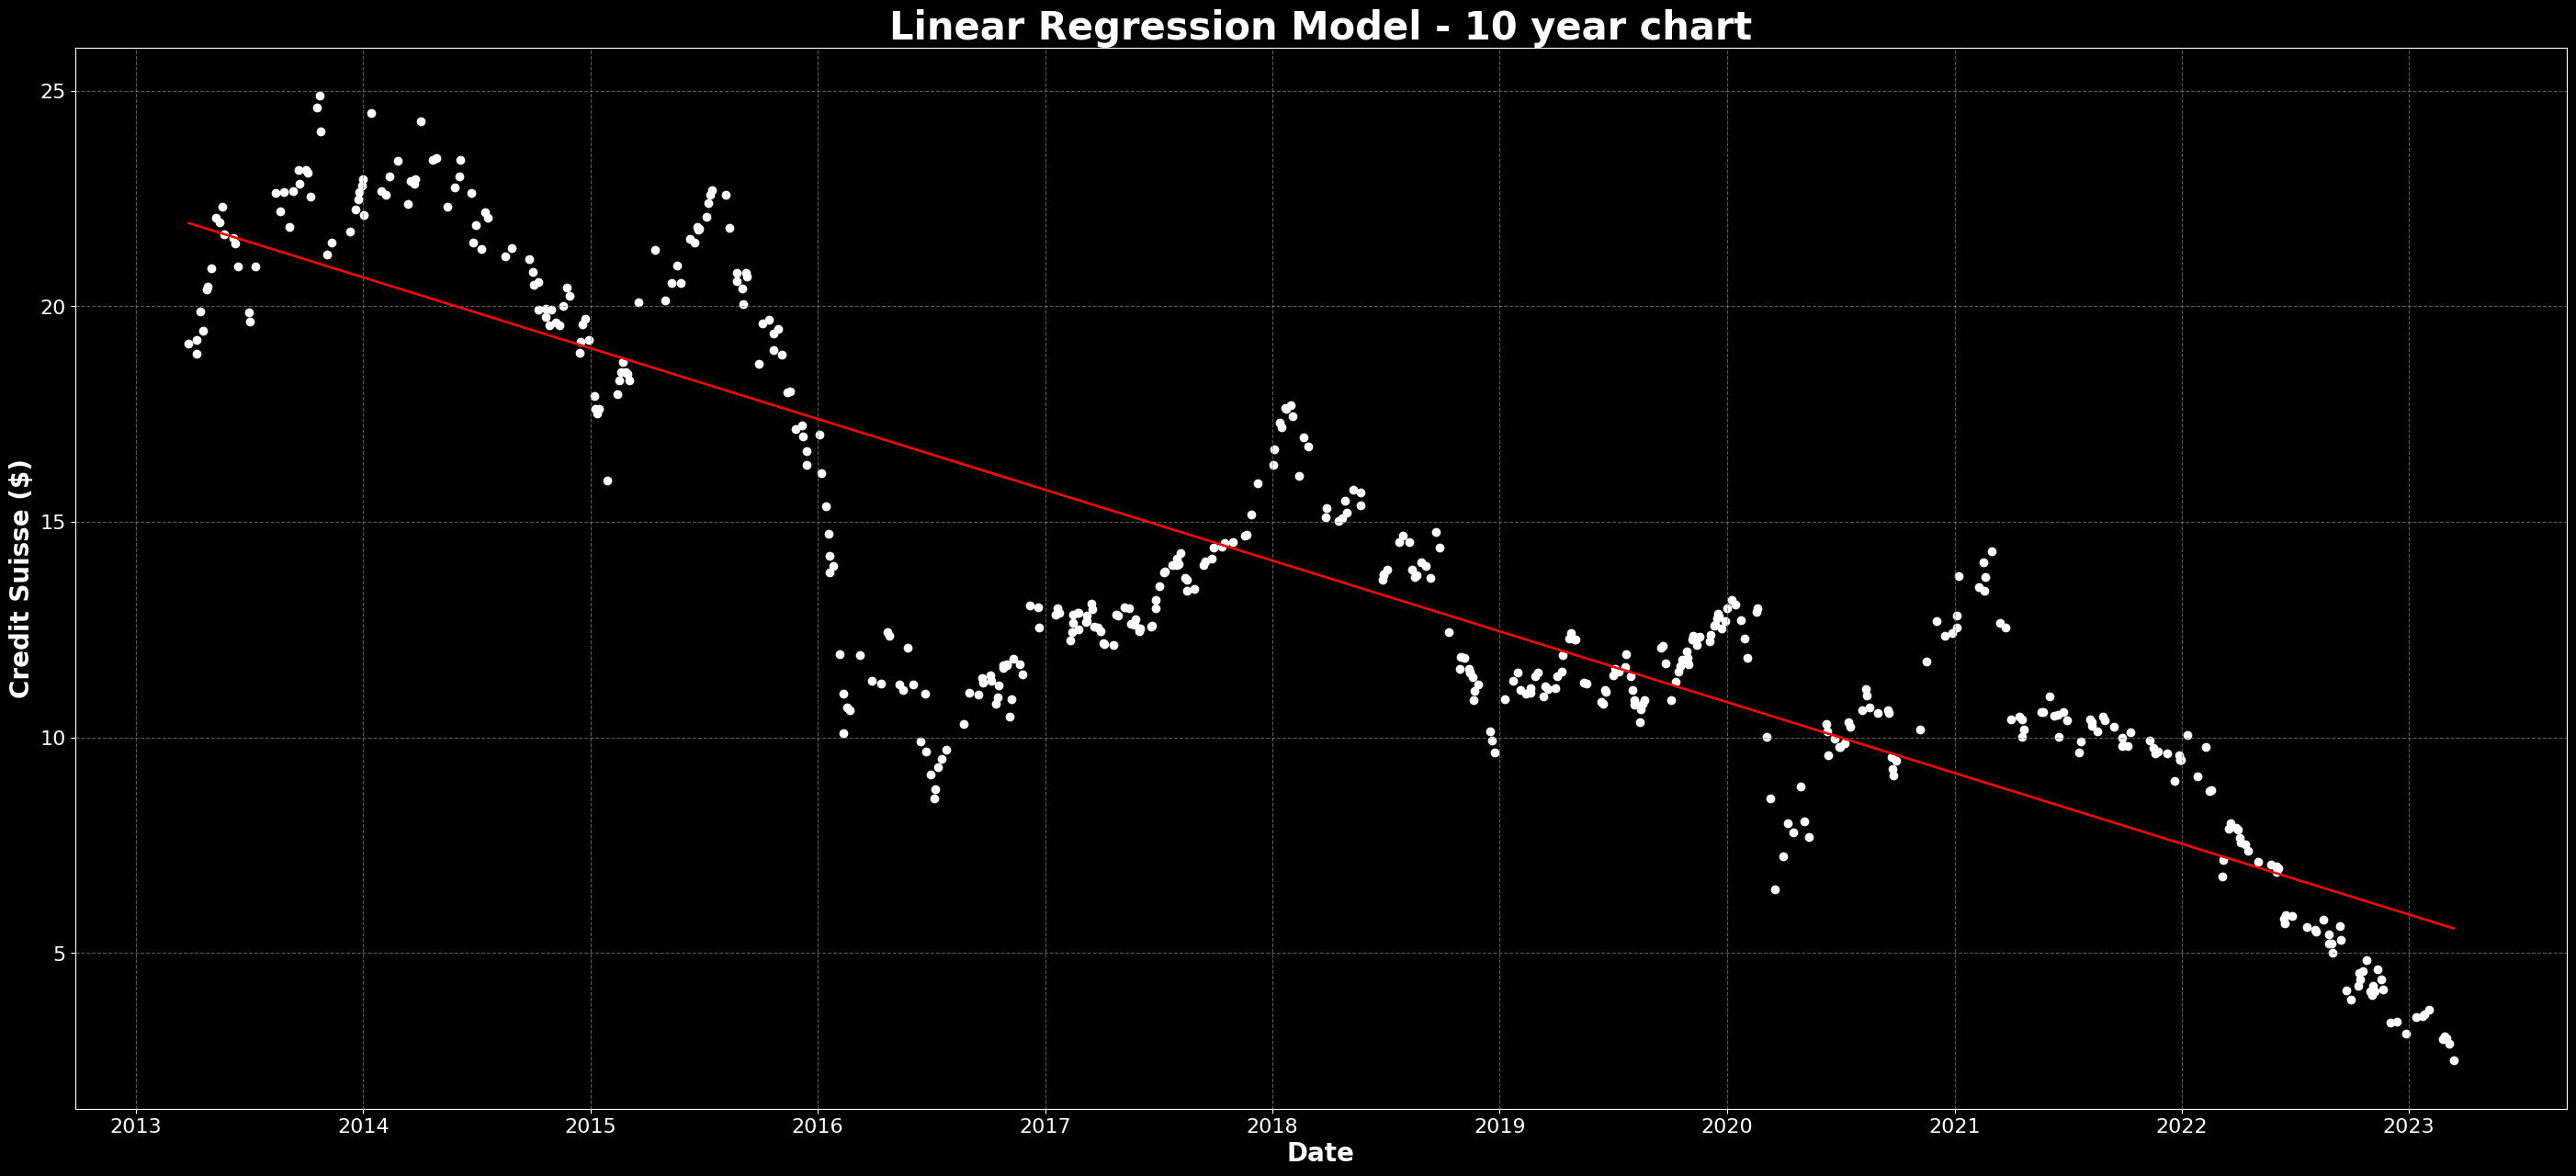

In [728]:
plt.style.use('dark_background')
plt.figure(figsize=(35,15))
plt.scatter(x=X_test, y=y_test, label='Actual', color='white')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.title('Linear Regression Model - 10 year chart', fontsize=30, color="White", fontweight='bold')
plt.xlabel("Date", fontsize=20, fontweight='bold')
plt.ylabel("Credit Suisse ($)", fontsize=20, fontweight='bold')
plt.tick_params(axis="both", labelsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.show()

## 1. ROI (RETURN ON INVESTMENT)

ROI = Net income / Cost of investment x 10

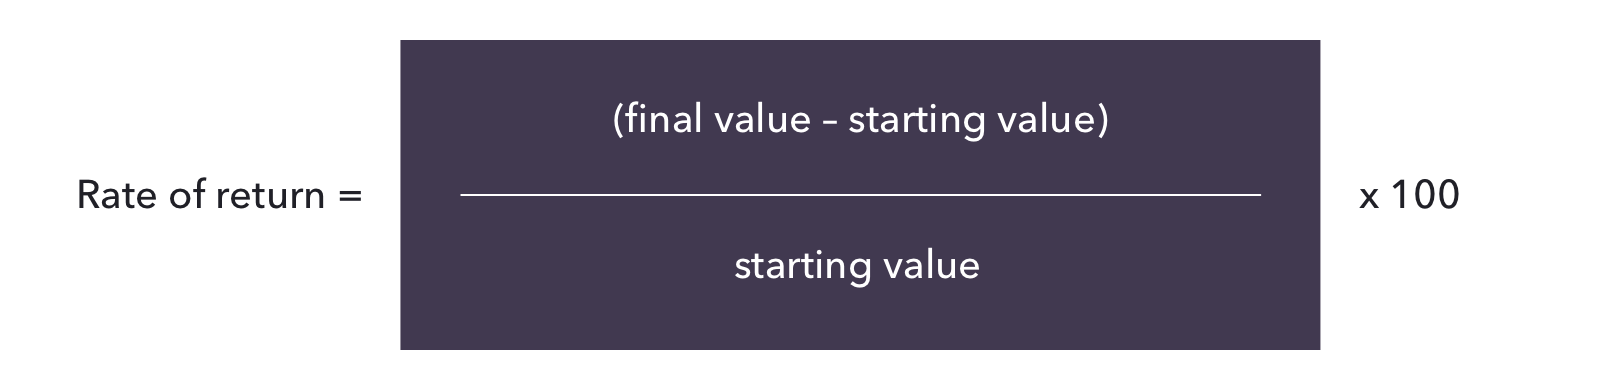

#### Example 1

LET TAKE A PERSON WHO INVESTED 9000 INTO A BUSINESS VENTURE AND SPENT AN ADDITIONAL 1000 RESEARCHING THE VENTURE. THE INVESTOR'S TOTAL COST WOULD BE 10000. IF THAT VENTURE GENERATED 30000 IN REVENUE BUT HAD 1000 IN PERSONNEL AND REGULATORY COSTS, THEN THE NET PROFITS WOULD BE 20000

In [30]:
total_revenue = 30000 #Amount of cash a company generate
cost_of_sale = 9000 + 1000 #Totat amount a company spent on cost of sale
net_income = 30000 - 10000 #Total revenue deducted by cost of sale

In [31]:
print(net_income)

20000


This code will take net income and cost of sales (investment ) as an input parameter and calculate the rate of return in the form of percentage

In [51]:
#formula for caculating return on investment
def return_on_investment(net_income, cost_of_sale):
        return_on_investment = net_income/cost_of_sale * 100
        return print(f'Return on your investment is {return_on_investment}%')

In [52]:
return_on_investment(20000, 10000)

Return on your investment is 200.0%


#### Converting all values into dataset

In [78]:
#priting index and values
dataset_1 = {"Total Revenue":total_revenue,
             "Cost of Sale":cost_of_sale,
             "Net income":net_income}
for i,j in enumerate (dataset_1):
    print(i,j)

0 Total Revenue
1 Cost of Sale
2 Net income


In [79]:
#printing keys
for k in dataset_1:
    print(k)

Total Revenue
Cost of Sale
Net income


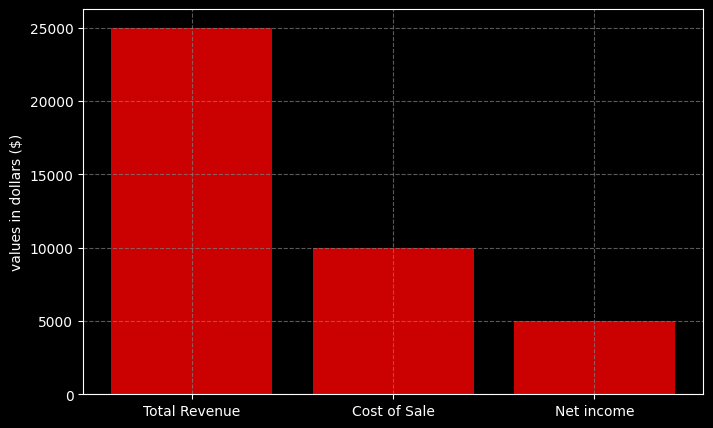

In [165]:
#Over here we can see, how three different values affect our investment.
plt.style.use('dark_background')
plt.figure(figsize=(8,5))
plt.bar(dataset_1.keys(), dataset_1.values(), color="red", alpha=0.8)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.ylabel('values in dollars ($)');

On top graph, we can see how total revenue, cost of sale and net income define our company. Total revenue is deducted from cost of sale. 

In [234]:
204094000 - 64984000

139110000

#### Example 2

AN INVESTOR PUT 10,000 INTO A VENTURE WITHOUT INCURRING ANY FEES OR ASSOCIATED COSTS. THE COMPANY'S NET PROFITS WERE 15,000. THE INVESTOR MADE 5,000. IT IS SIGNIFICANTLY MORE THAN THE 200 IN NET PROFITS GENERATED IN THE FIRST EXAMPLE. HOWEVER, THE ROI OFFERS A DIFFERENT VIEW: 15,000 DIVIDED BY 10,000 EQUALS 1.5. MULTIPLYING THAT BY 100 YIELDS AN ROI OF 150%.

In [104]:
net_profit = 15_000 #Total pure profit generated
cost_of_sale = 10_000#Totat amount a company spent on cost of sale
total_revenue = net_profit + cost_of_sale #Amount of cash a company generate

In [105]:
total_revenue

25000

In [106]:
def roi(total_revenue, cost_of_sale):
    net_income = total_revenue - cost_of_sale
    return_on_investment = (net_income)/(cost_of_sale) * 100
    return print(f'return on investment {return_on_investment}%')

In [107]:
roi(total_revenue, cost_of_sale)

return on investment 150.0%


In [108]:
#Let say if your total revenue is 12000 and cost of sale is 20000
#return is negative cuz cost of sale is higher as compare to total revenue
roi(12_000, 20_000)

return on investment -40.0%


## 2. RETURN ON COMPOUND INTEREST

Compound interest is a type of interest calculated on the initial principal and also on the accumulated interest of previous periods. The formula for compound interest is A = P * (1 + r/n)^(nt), where A is the final amount, P is the initial principal, r is the annual interest rate, n is the number of times that interest is compounded per year, t is the number of years, and ^ represents exponentiation.

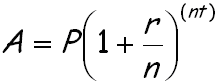

Compound interest can be earned in various financial products such as savings accounts, certificates of deposit (CDs), and individual retirement accounts (IRAs).

In [187]:
initial_investment = 10000
rate_of_return = 0.05 #5 percent annual return
time_period = 30 #30 years

In [188]:
# compount interest
final_amount = initial_investment * (1 + rate_of_return)**time_period

In [189]:
# Create a dictionary to store the results
results = {}

# Initialize the total investment
total = initial_investment

# Calculate and save the profit for each year
for year in range(1, time_period + 1):
    profit = total * rate_of_return
    total = total + profit
    results[year] = total

In [190]:
print("Final amount:", final_amount)

Final amount: 43219.42375150668


In [191]:
for year, predict in results.items():
    print(f"Year: {year}, Predict: {predict}")

Year: 1, Predict: 10500.0
Year: 2, Predict: 11025.0
Year: 3, Predict: 11576.25
Year: 4, Predict: 12155.0625
Year: 5, Predict: 12762.815625
Year: 6, Predict: 13400.95640625
Year: 7, Predict: 14071.0042265625
Year: 8, Predict: 14774.554437890625
Year: 9, Predict: 15513.282159785156
Year: 10, Predict: 16288.946267774414
Year: 11, Predict: 17103.393581163135
Year: 12, Predict: 17958.56326022129
Year: 13, Predict: 18856.491423232354
Year: 14, Predict: 19799.31599439397
Year: 15, Predict: 20789.28179411367
Year: 16, Predict: 21828.745883819356
Year: 17, Predict: 22920.183178010324
Year: 18, Predict: 24066.19233691084
Year: 19, Predict: 25269.501953756382
Year: 20, Predict: 26532.977051444203
Year: 21, Predict: 27859.62590401641
Year: 22, Predict: 29252.607199217233
Year: 23, Predict: 30715.237559178095
Year: 24, Predict: 32250.999437136998
Year: 25, Predict: 33863.549408993844
Year: 26, Predict: 35556.72687944354
Year: 27, Predict: 37334.56322341572
Year: 28, Predict: 39201.291384586504
Year

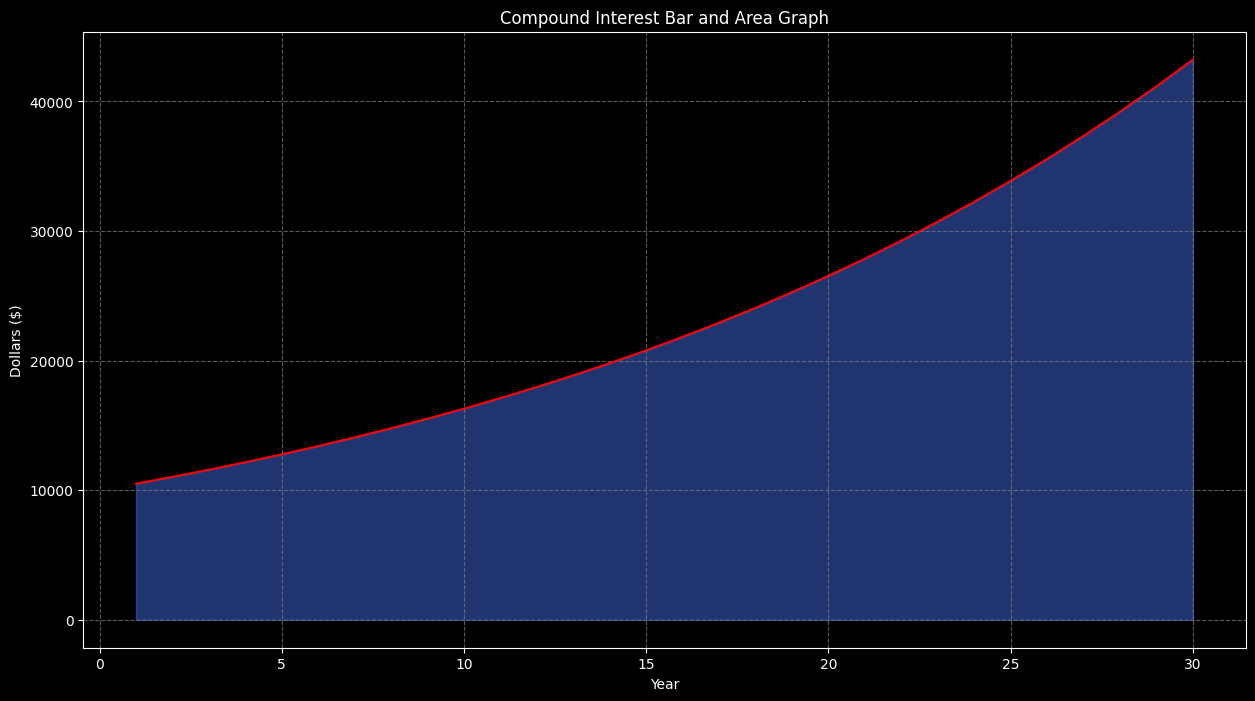

In [199]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.fill_between(results.keys(), results.values(), alpha=0.5, color="royalblue")
plt.plot(results.keys(), results.values(), color="red")
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Dollars ($)')
plt.title('Compound Interest Bar and Area Graph')
plt.show()

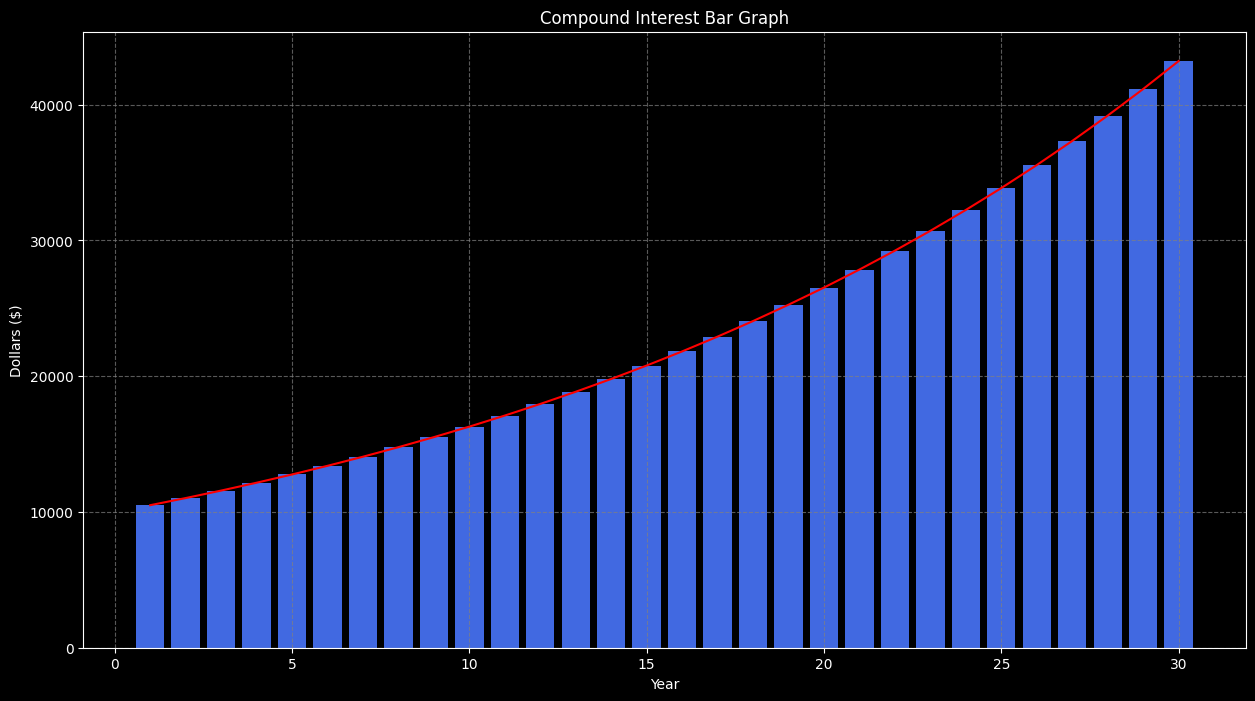

In [202]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.bar(results.keys(), results.values(), color="royalblue")
plt.plot(results.keys(), results.values(), color="red")
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Dollars ($)')
plt.title('Compound Interest Bar Graph')
plt.show()

## 3. SIMPLE RETURN

Lets say our initial investment is 10000 dollars, rate of return is 15 percent and time period is 20 years, we have to calculate simple return and total amount.

In [603]:
initial_investment = 10000
rate_of_return = 0.12 #12 percent annual return
time_period = 30 #30 years

Simple return will be total return we recieved after 10 year of investment

In [604]:
simple_return = (initial_investment * (1 + rate_of_return)) - initial_investment
print("Simple return:", simple_return)

Simple return: 1200.0000000000018


In [605]:
total_return = initial_investment + simple_return
print("Total return:", total_return)

Total return: 11200.000000000002


## DIVIDENDS RETURN

In [606]:
dividends = 500
total_return = simple_return + dividends
print("Total return:", total_return)

Total return: 1700.0000000000018


## THE COMPOUND ANNUAL GROWTH RATE

In [607]:
CAGR = (initial_investment * (1 + rate_of_return) ** time_period / initial_investment) ** (1 / time_period) - 1

In [608]:
print("CAGR:", CAGR)

CAGR: 0.1200000000000001


## HOLDING PERIOD RETURN (HRR)

Holding Period Return (HPR): HPR is the return earned on an investment over a specific period of time, taking into account both the capital appreciation and any income generated. It is calculated as the total return divided by the holding period, which is the length of time the investment is held. Here's an example of how to calculate HPR in Python:

In [617]:
initial_investment = 1000
final_investment = 12000
holding_period = 5 #year

In [618]:
holding_period_return = (final_investment - initial_investment) / initial_investment / holding_period
print(holding_period_return)

2.2
